# Fully connected neural network with numpy

Check this for background: https://www.coursera.org/learn/neural-networks-deep-learning/home/module/3

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Prepare dataset

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris = iris[iris['species'].isin(['setosa', 'virginica'])]

In [4]:
X = iris.iloc[:,0:4].to_numpy().T

In [5]:
Y = (iris['species'] == 'setosa').to_numpy().astype(int).reshape(1, -1)

In [6]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
iris['species'].value_counts()

species
setosa       50
virginica    50
Name: count, dtype: int64

In [8]:
X[:,:5]  # each column 

array([[5.1, 4.9, 4.7, 4.6, 5. ],
       [3.5, 3. , 3.2, 3.1, 3.6],
       [1.4, 1.4, 1.3, 1.5, 1.4],
       [0.2, 0.2, 0.2, 0.2, 0.2]])

In [9]:
Y.shape

(1, 100)

In [10]:
Y[0, :10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Neural network with a single hidden layer

- layer 0: input with $n_0$ units
- layer 1: hidden layer with $n_1$ units
    - activation: sigmoid
- layer 1: output layer with $n_2 = 1$ unit
    - activaiton: sigmoid

In [11]:
n0 = X.shape[0]
n1 = 4
n2 = 1
n0, n1, n2

(4, 4, 1)

In [12]:
# number of test examples
m = X.shape[1]
m

100

### Define the activation function

In [13]:
def sigmoid(x):
    """Vectorized sigmoid function"""
    return 1 / (1 + np.exp(-x))

In [14]:
sigmoid(np.array([[-2, 0, 1],
                  [1, 0, -2]]))

array([[0.11920292, 0.5       , 0.73105858],
       [0.73105858, 0.5       , 0.11920292]])

### Parameter random initialization

In [15]:
W1 = np.random.normal(size=(n1, n0)) * 0.01
b1 = np.random.normal(size=(n1, 1)) * 0.01
W2 = np.random.normal(size=(n2, n1)) * 0.01
b2 = np.random.normal(size=(n2, 1)) * 0.01

### Optimize parameters with the gradient descent method

note
- matrix multiplication: `np.matmul(A, B)`, `A @ B`, where A, B are matrices;
- element wise production: `np.multiply(A, B)`, `A * B`, where A, B are matrices are of the same shape (after broadcasting if necessary);
- dot product (result is a scalar): `np.dot(A, B)`, `np.sum(A * B)`, where A, B are vectors of the same size;

In [16]:
epochs = 1000
alpha = 0.1

In [17]:
costs = np.zeros(epochs)
for i in range(epochs):
    # foward propargation
    Z1 = W1 @ X + b1
    A1 = sigmoid(Z1)
    Z2 = W2 @ A1 + b2
    A2 = sigmoid(Z2)
    
    # cost function
    J = -np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2)) / m
    costs[i] = J
    
    # back propargation
    dZ2 = A2 - Y
    dW2 = dZ2 @ A1.T / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = (W2.T @ dZ2) * (A1[1] * (1 - A1[1]))
    dW1 = dZ1 @ X.T / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    # update parameter with gradient descent
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2    

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Cost')]

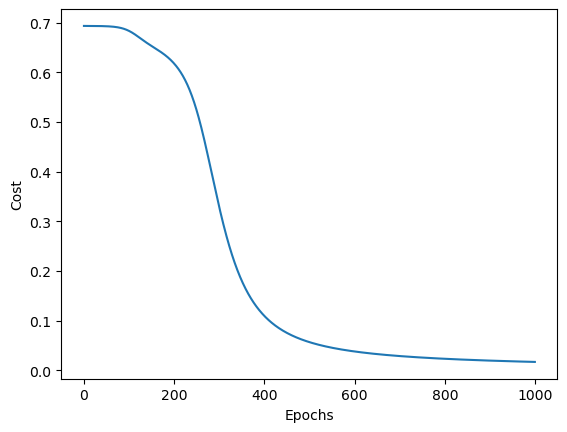

In [18]:
ax = sns.lineplot(costs)
ax.set(xlabel='Epochs', ylabel='Cost')

[Text(0.5, 0, 'Observed y'), Text(0, 0.5, 'Predicted y')]

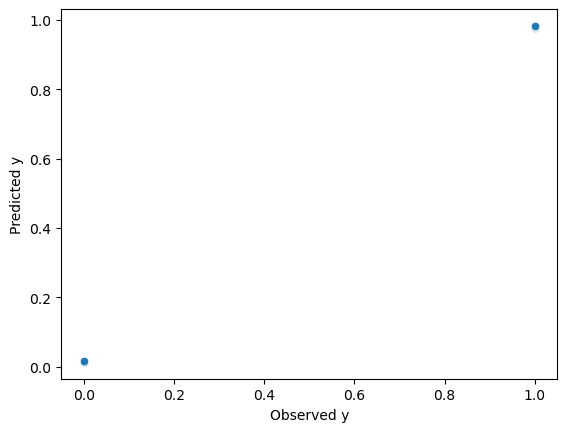

In [19]:
ax = sns.scatterplot(x=Y[0,:], y=A2[0,:])
ax.set(xlabel='Observed y', ylabel='Predicted y')

### Using variable learning rates
begin with large steps, ends with small steps during gradient learning

In [20]:
W1 = np.random.normal(size=(n1, n0)) * 0.01
b1 = np.random.normal(size=(n1, 1)) * 0.01
W2 = np.random.normal(size=(n2, n1)) * 0.01
b2 = np.random.normal(size=(n2, 1)) * 0.01

epochs = 1500

def f_alpha(epoch):
    if epoch < 500:
        return 0.1
    elif epoch < 750:
        return 0.03
    elif epoch < 1000:
        return 0.01
    else:
        return 0.001

In [21]:
costs = np.zeros(epochs)
for i in range(epochs):
    # foward propargation
    Z1 = W1 @ X + b1
    A1 = sigmoid(Z1)
    Z2 = W2 @ A1 + b2
    A2 = sigmoid(Z2)
    
    # cost function
    J = -np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2)) / m
    costs[i] = J
    
    # back propargation
    dZ2 = A2 - Y
    dW2 = dZ2 @ A1.T / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = (W2.T @ dZ2) * (A1[1] * (1 - A1[1]))
    dW1 = dZ1 @ X.T / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    # update parameter
    W1 -= f_alpha(i) * dW1
    b1 -= f_alpha(i) * db1
    W2 -= f_alpha(i) * dW2
    b2 -= f_alpha(i) * db2


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Cost')]

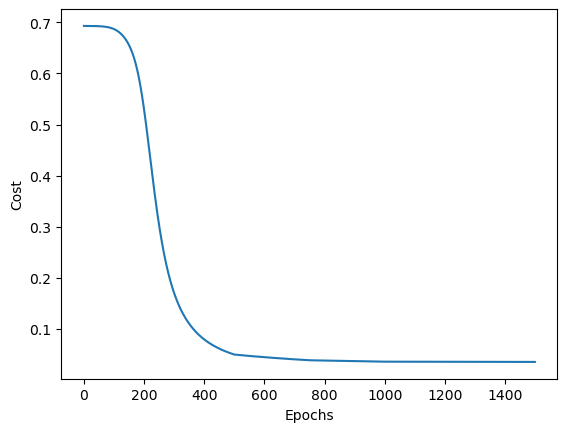

In [22]:
ax = sns.lineplot(costs)
ax.set(xlabel='Epochs', ylabel='Cost')

In [23]:
J, W1, b1, W2, b2

(np.float64(0.0354142790823433),
 array([[ 0.64353462,  1.28095157, -1.87602828, -0.93261914],
        [-0.28607867, -0.60641404,  0.92973988,  0.48267199],
        [-0.21321129, -0.47658949,  0.74095376,  0.37658832],
        [-0.47839956, -1.07090428,  1.65058911,  0.83492315]]),
 array([[ 0.30822409],
        [-0.13777332],
        [-0.11208054],
        [-0.25107628]]),
 array([[ 2.81065308, -1.39249569, -1.11526806, -2.16539746]]),
 array([[0.77711635]]))